Import required packages

In [1]:
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Linear regression

Model: $\hat{y} = h_{\theta}(X) = X \bullet \theta$

Run next cell to data for linear regression.

In [2]:
#
X = 2 * np.random.randn(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

First visualize X and y

Text(0,0.5,'y')

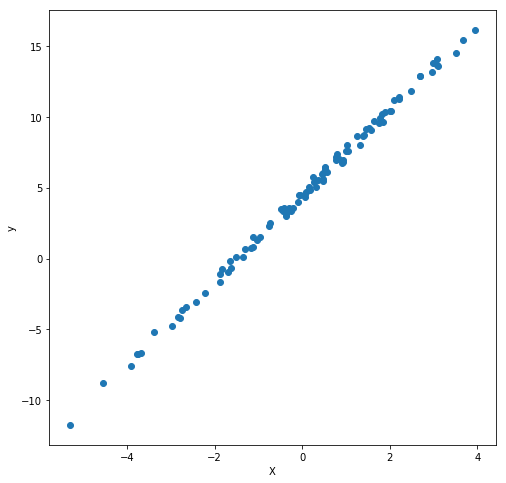

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

Add X0 to X and return X_b; then compute $\theta$ by normal function

In [4]:
from numpy.linalg import inv

In [5]:
X_b = np.c_[np.ones((100, 1)), X]

In [6]:
theta = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta

array([[4.48579072],
       [3.01876496]])

Now plot the line of the fitted model with the scatter plot of the training data. Set limit at [-4, 4]

In [8]:
X_end = np.array([[1, -4], [1, 4]])
y_pred_end = X_end.dot(theta)

(-4, 4)

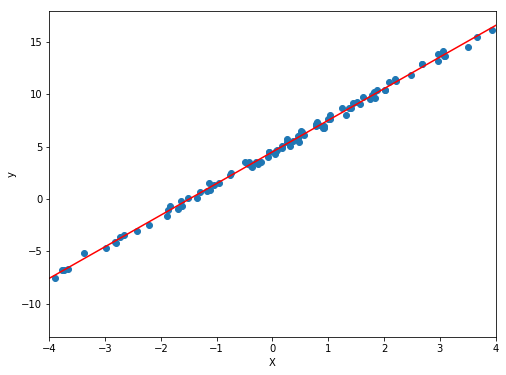

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(X_end[:, -1], y_pred_end, 'r-')
plt.xlabel('X')
plt.ylabel('y')
plt.xlim([-4, 4])

sklearn.linear_model.LinearRegression uses this normal function. Now fit the model by LinearRegressor and check the fitted coefficients. And test predictioin.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg_lr = LinearRegression()
reg_lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
reg_lr.coef_

array([[3.01876496]])

In [13]:
reg_lr.intercept_

array([4.48579072])

In [14]:
reg_lr.predict(X[:10, :])

array([[10.59837984],
       [ 9.84849598],
       [ 1.0916152 ],
       [-0.42273427],
       [ 3.01287249],
       [ 9.92782923],
       [ 7.02457515],
       [ 5.25696946],
       [ 3.71169545],
       [ 8.48701253]])

The SGDRegressor uses gradient descent to optimize theta, instead of normal function. Now solve the linear regression by SGDRegressor with no penalty and max_iter=50

In [15]:
from sklearn.linear_model import SGDRegressor

In [16]:
reg_sgd = SGDRegressor(penalty=None, max_iter=50)
reg_sgd.fit(X, y)

/home/chris/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [17]:
reg_sgd.coef_

array([3.02028327])

In [18]:
reg_sgd.intercept_

array([4.48370684])

# Polynomial Regression

Run next cell to generate some data

In [19]:
#
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(n, 1) # y = 0.5X^2 + X + 2
y = y.ravel()

Now use PolynomialFeatures to generate polynomial features at degree of 2.

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [22]:
X_poly = poly.fit_transform(X)

Now fit linear regression.

In [23]:
reg_lr = LinearRegression()
reg_lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now visualize the traing data and the fitted model.

Text(0,0.5,'y')

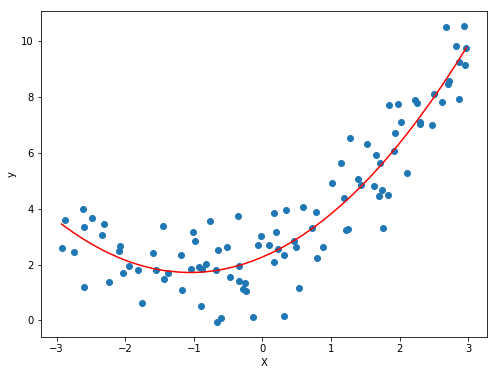

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
y_pred = reg_lr.predict(X_poly)
idx_sort = np.argsort(X.ravel())
X_sort = X[idx_sort]
y_pred_sort = y_pred[idx_sort]
plt.plot(X_sort, y_pred_sort, color='r')
plt.xlabel('X')
plt.ylabel('y')

# Ridge regression

Use Ridge to fit the linear regression model for X_poly and y. Use alpha=1 and the closed-form solution.

In [25]:
from sklearn.linear_model import Ridge

In [26]:
reg_ridge = Ridge(alpha=1, solver='cholesky')

In [27]:
reg_ridge.fit(X_poly, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

Predict by the ridge model at X_poly[0]

In [28]:
reg_ridge.predict(X_poly[0:1])

array([2.04448737])

Use SGDRegressor to fit the model again with L2 penalty at alpha=0.1

In [29]:
reg_sgd_l2 = SGDRegressor(penalty='l2', alpha=0.1)
reg_sgd_l2.fit(X_poly, y)

/home/chris/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.1, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Predict at X_poly[0]

In [30]:
reg_sgd_l2.predict(X_poly[0:1])

array([0.97629681])

# Lasso Regression

Now use Lasso to fit X_poly and y at alph=0.1. Then predict at X_poly[0]

In [31]:
from sklearn.linear_model import Lasso

In [32]:
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_poly, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
reg_lasso.predict(X_poly[0:1])

array([2.08478517])

# Early Stopping

Run next cell to generate synthetic data.

In [34]:
#
n = 100
X = 6*np.random.rand(n, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(n, 1)
y = y.ravel()

Visualize X and y

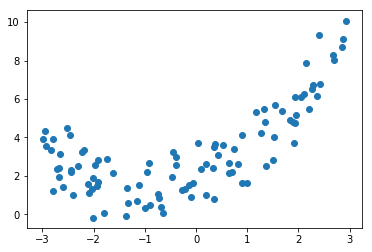

In [35]:
plt.scatter(X, y)

Split X and y to X_train, X_val, y_train, y_val at a 80:20 ratio.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Now define a pipeline that:
1. Convert X to X_poly = [X, X^2, X^3, ..., X^90]
2. Normalize X_poly

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [39]:
line = Pipeline([('poly', PolynomialFeatures(degree=90, include_bias=False)), \
                 ('normalize', StandardScaler())])

Convert both X_train and X_test by the defined pipeline.

In [40]:
X_train_poly = line.fit_transform(X_train)
X_val_poly  = line.transform(X_val)

Build a linear regression model using stochastic gradient descent, at constant learning rate of 0.0005, and no penalty term, and only one epoch. We would fit this model iteratively, so keep it warm

In [41]:
reg_sgd = SGDRegressor(penalty=None, learning_rate='constant', eta0=0.0005, max_iter=1, warm_start=True)

Fit the model 1000 epoches. Record the validation error (MSE) after each epoch. Find out the best epoch and best model.

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

In [43]:
best_epoch = None
best_model = None
best_MSE = np.inf
val_mse_list = []
n_epoch = 1000
for idx_epoch in range(n_epoch):
    reg_sgd.fit(X_train_poly, y_train)
    y_pred = reg_sgd.predict(X_val_poly)
    mse = mean_squared_error(y_val, y_pred)
    val_mse_list.append(mse)
    if mse < best_MSE:
        best_MSE = mse
        best_model = clone(reg_sgd)
        best_epoch = idx_epoch

Plot epoch vs. validation error. Verify the best epoch.

Text(0,0.5,'Validation MSE')

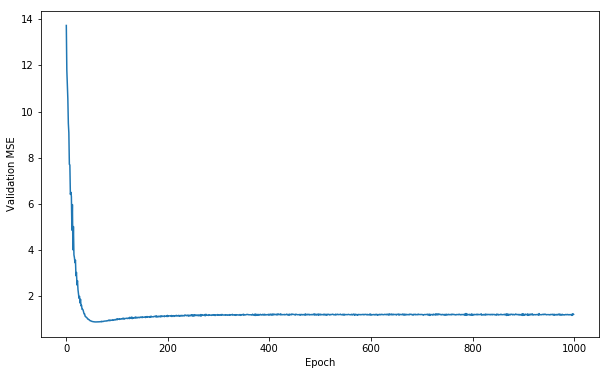

In [44]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
axes.plot(range(n_epoch), val_mse_list)
axes.set_xlabel('Epoch')
axes.set_ylabel('Validation MSE')

In [45]:
best_epoch

59

# Logistic Regression

Load Iris data from sklearn and denote the result as iris.

In [46]:
from sklearn.datasets import load_iris

In [47]:
iris = load_iris()

Run next cell to define X and y

In [48]:
#
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Virginia, else 0

Now fit a Logistic regression model by default settings.

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
clf_log = LogisticRegression()
clf_log.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now plot model estimated probility of Virginia with penal widths varying from 0 to 3 cm.

In [51]:
X_test = np.linspace(0, 3, num=100).reshape((-1, 1))

In [52]:
pro_X_test = clf_log.predict_proba(X_test)

Plot a figure showing: 
1. Penal width vs. probability of Virginia
2. Penal width vs. probability of non-Virginia

Text(0,0.5,'Probability')

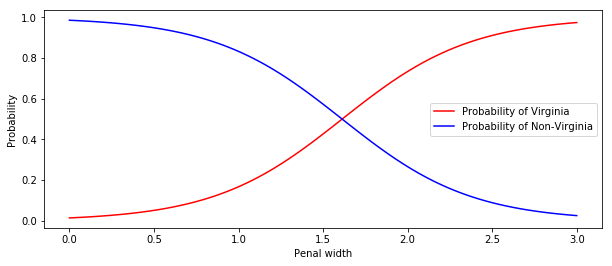

In [53]:
plt.figure(figsize=(10, 4))
plt.plot(X_test, pro_X_test[:, 1], 'r-', label='Probability of Virginia')
plt.plot(X_test, pro_X_test[:, 0], 'b-', label='Probability of Non-Virginia')
plt.legend()
plt.xlabel('Penal width')
plt.ylabel('Probability')

Run next cell to generate data of a multi-class problem.

In [54]:
#
X =iris['data'][:, (2, 3)]
y = iris['target'] # 3 classes

Fit a softmax model for this multilabel classification problem

In [55]:
clf_softmax = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [56]:
clf_softmax.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Predict at [[5, 2]]. Also compute the probability of each class.

In [57]:
clf_softmax.predict([[5, 2]])

array([2])

In [58]:
clf_softmax.predict_proba([[5, 2]])

array([[2.42794737e-04, 2.14966717e-01, 7.84790488e-01]])